In [1]:
from fenics import *

In [2]:
mesh = UnitSquareMesh(10, 10) #Here, the number 10, 10 decides the number of divisions required in each dimension. 
V = FunctionSpace(mesh, 'P', 1)

In [3]:
d_D = Expression('0',degree=0)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, d_D, boundary)

We have the governing equation as follows:

$$ -T\nabla^2{d} = p \hspace{10pt} in \hspace{10pt} D$$

$$ p(x,y) = \frac{A}{2\sigma \pi} exp( \frac{-1}{2} (\frac{(x - x_0)}{\sigma})^2 \frac{-1}{2} (\frac{(y - y_0)}{\sigma})^2 $$

Taking $A = 2$ and $\sigma = 1$ and $x_0 = 0.5$ and $y_0 = 0.5$ and $T = 1$ so it reduces to solving a poisson equation, which is as follows,

$$ -\nabla^2{d} = p \hspace{10pt} in \hspace{10pt} D$$

$$ d = 0 \hspace{10pt} on \hspace{10pt} \delta D $$

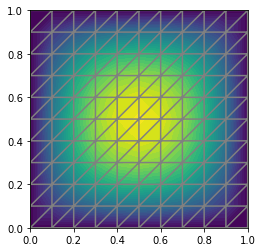

In [5]:
u = TrialFunction(V)
v = TestFunction(V)
f = Expression('(1/3.14)*exp((-0.5)*(pow(x[0]-0.5, 2) + pow(x[1] - 0.5, 2)))', degree=1)
a = dot(grad(u), grad(v))*dx  # These a and L are what we defined in the formulation above. 
L = f*v*dx

u = Function(V)
solve(a == L, u, bc) 

plot(u, wireframe = True)#, interactive = True)
plot(mesh)